In this notebook we are just going to be looking at a small and simple gravity simulation with three point masses. This is just an experiment into physical simulations so its nothing fancy. Infact it uses the worst undating algorithm, of just following each particle and updating its positions/interactions on every iteration. Very computationally heavy, but that isnt the purpose of this notebook. I intend to look into optimized designs in the future but this is more of a proof of concept notebook.

In [1]:
# Run this line below into the console while in the directory of where the images will be saved.

# ffmpeg -start_number 0 -framerate 60 -i graph%01d.png video.webm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import decimal
import os

In [5]:
# The gravitational body in question
# creates an instance of a gravitational point mass.
# position, velocity and acceleration should all be 1x2 arrays
class PointMassBody:
    def __init__(self,mass,position,velocity,acceleration):
        self.mass = mass
        self.position = position
        self.velocity = velocity
        self.acceleration = acceleration

# update(): takes in the time step size and updates the system by that time step
def update(dt):
    F12Hat = (b2.position-b1.position)/np.linalg.norm(b2.position-b1.position)
    F13Hat = (b3.position-b1.position)/np.linalg.norm(b3.position-b1.position)
    
    F21Hat = (b1.position-b2.position)/np.linalg.norm(b1.position-b2.position)
    F23Hat = (b3.position-b2.position)/np.linalg.norm(b3.position-b2.position)
    
    F31Hat = (b1.position-b3.position)/np.linalg.norm(b1.position-b3.position)
    F32Hat = (b2.position-b3.position)/np.linalg.norm(b2.position-b3.position)
    
    F12 = ((G*b1.mass*b2.mass)/pow(np.linalg.norm(b2.position-b1.position),2))*F12Hat
    F13 = ((G*b1.mass*b3.mass)/pow(np.linalg.norm(b3.position-b1.position),2))*F13Hat
    
    F21 = ((G*b2.mass*b1.mass)/pow(np.linalg.norm(b1.position-b2.position),2))*F21Hat
    F23 = ((G*b2.mass*b3.mass)/pow(np.linalg.norm(b3.position-b2.position),2))*F23Hat
    
    F31 = ((G*b3.mass*b1.mass)/pow(np.linalg.norm(b1.position-b3.position),2))*F31Hat
    F32 = ((G*b3.mass*b2.mass)/pow(np.linalg.norm(b2.position-b3.position),2))*F32Hat
    
    b1.acceleration = (1/b1.mass)*(F12+F13)
    b1.velocity = b1.velocity+(b1.acceleration*dt)
    b1.position = b1.position+(b1.velocity*dt)
    b1.KE = (1/2)*b1.mass*np.dot(b1.velocity,b1.velocity)
    
    b2.acceleration = (1/b2.mass)*(F21+F23)
    b2.velocity = b2.velocity+(b2.acceleration*dt)
    b2.position = b2.position+(b2.velocity*dt)
    b2.KE = (1/2)*b2.mass*np.dot(b2.velocity,b2.velocity)
    
    b3.acceleration = (1/b3.mass)*(F31+F32)
    b3.velocity = b3.velocity+(b3.acceleration*dt)
    b3.position = b3.position+(b3.velocity*dt)
    b3.KE = (1/2)*b3.mass*np.dot(b3.velocity,b3.velocity)
    
    path1 = np.append(path1, [b1.position], axis=0)
    path2 = np.append(path2, [b2.position], axis=0)
    path3 = np.append(path3, [b3.position], axis=0)

UnboundLocalError: local variable 'path1' referenced before assignment

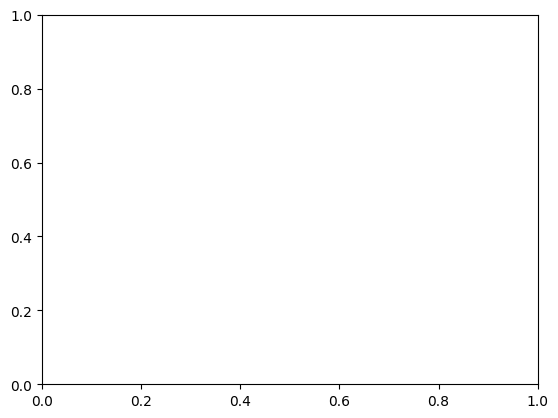

In [6]:
%%time

#The path below should be the path that YOU are saving every frame to. I didnt want to provide my personal one, so unfortunately this is the one thing you will have to do yourself
dir = 'C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics Simulations/Images for simulation'

for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

#Initilize variables
b1 = PointMassBody(1000000000000, np.array([30,0]), np.array([0-3,2]), np.array([0,0]))
b2 = PointMassBody(2000000000000, np.array([-30,0]), np.array([1.4,1]), np.array([0,0]))
b3 = PointMassBody(500000000000, np.array([0,30]), np.array([-0.9,-0.08]), np.array([0,0]))

dt=1/30
G = 6.674*pow(10,-11)

#Start the main loop
for i in range(100):
    figure, axes = plt.subplots()
    update(dt)
    
    axes.scatter([b1.position[0],b2.position[0],b3.position[0]],[b1.position[1],b2.position[1],b3.position[1]],color=["r","g","b"])
    axes.scatter([path1[0],path2[0],path3[0]],[path1[1],path2[1],path3[1]],color=["r","g","b"])
    plt.grid()
    plt.xlim(-100,100)
    plt.ylim(-100,100)
    
    figure.savefig('/Users/darkb/Documents/Uidaho Classes/CS shit/Physics Simulations/Images for simulation/graph'+str(i)+'.png')
    plt.close('all')

In [ ]:
%%time

#The path below should be the path that YOU are saving every frame to. I didnt want to provide my personal one, so unfortunately this is the one thing you will have to do yourself
dir = 'C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics Simulations/Images for simulation'

for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

#Initilize variables
b1 = PointMassBody(1000000000000, np.array([30,0]), np.array([0-3,2]), np.array([0,0]))
b2 = PointMassBody(2000000000000, np.array([-30,0]), np.array([1.4,1]), np.array([0,0]))
b3 = PointMassBody(500000000000, np.array([0,30]), np.array([-0.9,-0.08]), np.array([0,0]))

path1 = np.array([b1.position])
path2 = np.array([b2.position])
path3 = np.array([b3.position])

dt=1/30
G = 6.674*pow(10,-11)

#Start the main loop
for i in range(100):
    figure, axes = plt.subplots()
    update(dt)
    
    axes.scatter([b1.position[0],b2.position[0],b3.position[0]],[b1.position[1],b2.position[1],b3.position[1]],color=["r","g","b"])
    axes.scatter([path1[0],path2[0],path3[0]],[path1[1],path2[1],path3[1]],color=["r","g","b"])
    plt.grid()
    plt.xlim(-100,100)
    plt.ylim(-100,100)
    
    figure.savefig('/Users/darkb/Documents/Uidaho Classes/CS shit/Physics Simulations/Images for simulation/graph'+str(i)+'.png')
    plt.close('all')